In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing 
import math
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('darkgrid')

rcParams['figure.figsize'] = 10,7

In [26]:
# import data
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
for i in df.columns:
    print(i)
    print(df[i].describe())
    print()

age
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

sex
count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

cp
count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

trestbps
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

chol
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

fbs
count    303.000000
mean       

In [28]:
X = df[df.columns[:-1]]
y = df.target

X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)


c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


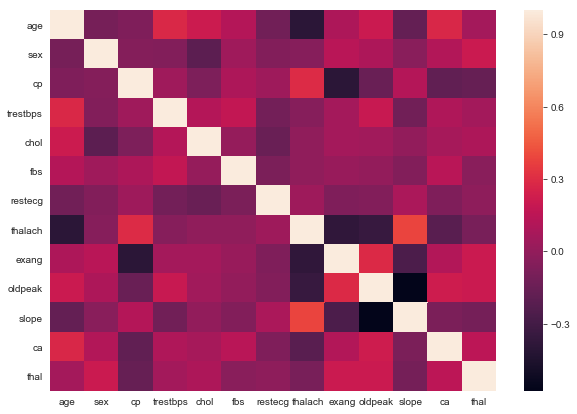

In [29]:
# heatmap with correlation 
corrmat = X.corr()
sns.heatmap(corrmat)

In [41]:
# initialize Logistic Regression
logreg = linear_model.LogisticRegression(C=1e15)

# Fit the model
logreg.fit(X, y)

# Score with 10=k folds
logreg_score = cross_val_score(logreg, X, y, cv= 10)
coef = logreg.coef_
intercept = logreg.intercept_
print('All R-Squares:', logreg_score)
print()
print('R-Squared:', logreg_score.mean())
print('intercept:', intercept)

# Display feature coefficients
coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Features']
coef_df['Coef'] = coef.reshape(-1,1)
coef_df

All R-Squares: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]

R-Squared: 0.8104041527623286
intercept: [0.11648387]


c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local

,Features,Coef
0,age,-0.044515
1,sex,-0.817957
2,cp,0.885948
3,trestbps,-0.341017
4,chol,-0.239588
5,fbs,0.012410
6,restecg,0.244798
7,thalach,0.530737
8,exang,-0.459624
9,oldpeak,-0.626279


In [42]:
# initialize ridge
ridge = linear_model.LogisticRegression(penalty='l2', C=1e15)

# Fit lasso
ridge.fit(X, y)

# test and look at scores
ridge_score = cross_val_score(ridge, X, y, cv=10)

print('All Scores:', ridge_score)
print()
print('score:', ridge_score.mean())
print('intercept:', ridge.intercept_)


All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]

score: 0.8104041527623286
intercept: [0.11648387]


c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local

In [43]:
# initialize lasso
lasso = linear_model.LogisticRegression(penalty='l1', C=1e15)

# Fit lasso
lasso.fit(X, y)

# test and look at scores
lasso_score = cross_val_score(lasso, X, y, cv=10)
print('All Scores:', lasso_score)
print()
print('score:', lasso_score.mean())
print('intercept:', lasso.intercept_)
print('number of features retained:', (lasso.coef_ != 0).sum())

coef_df = pd.DataFrame(X.columns)
coef_df.columns = ['Features']
coef_df['Coef'] = lasso.coef_.reshape(-1,1)
coef_df

All Scores: [0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]

score: 0.8104041527623286
intercept: [0.11647757]
number of features retained: 13


c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\gebruiker\appdata\local

,Features,Coef
0,age,-0.044572
1,sex,-0.817878
2,cp,0.885914
3,trestbps,-0.340932
4,chol,-0.239465
5,fbs,0.012383
6,restecg,0.244814
7,thalach,0.530745
8,exang,-0.459610
9,oldpeak,-0.626362


In [44]:
print(logreg_score)
print(ridge_score)
print(lasso_score)

[0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
[0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
[0.87096774 0.80645161 0.83870968 0.90322581 0.83870968 0.76666667
 0.83333333 0.86666667 0.68965517 0.68965517]
